In [52]:
import pandas as pd
import numpy as np

In [53]:
data = pd.read_csv('salary.csv')
data.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [54]:
data.describe()

,salary_more_then_100k
count,16.000
mean,0.625
std,0.500
min,0.000
25%,0.000
50%,1.000
75%,1.000
max,1.000


In [55]:
data.dtypes

company                  object
job                      object
degree                   object
salary_more_then_100k     int64
dtype: object

In [56]:
data.isnull().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le_comapny = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [59]:
data.company =  le_comapny.fit_transform(data['company'])
data.job = le_job.fit_transform(data['job'])
data.degree = le_degree.fit_transform(data['degree'])
data.head()

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0


In [60]:
from sklearn import tree

In [61]:
model = tree.DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)

In [62]:
x = data.values[:, 1:5]
y = data.values[:,0]

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2 , random_state=100)

In [65]:
x_train

array([[2, 1, 1],
       [2, 1, 0],
       [1, 0, 1],
       [1, 1, 1],
       [0, 0, 1],
       [1, 0, 0],
       [2, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 1],
       [1, 1, 1],
       [0, 0, 0]], dtype=int64)

In [66]:
x_test

array([[0, 1, 1],
       [0, 1, 1],
       [2, 0, 1],
       [2, 1, 0]], dtype=int64)

In [67]:
y_train

array([1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 0], dtype=int64)

In [68]:
y_test

array([1, 0, 1, 2], dtype=int64)

In [69]:
model.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [70]:
model_entropy = tree.DecisionTreeClassifier(criterion = "entropy",
            random_state = 100,max_depth=3, min_samples_leaf=5)

In [71]:
model_entropy.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [72]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 0], dtype=int64)

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [74]:
confusion_matrix(y_test , y_pred)

array([[0, 1, 0],
       [0, 2, 0],
       [1, 0, 0]], dtype=int64)

In [75]:
accuracy_score(y_test , y_pred) *100

50.0

In [76]:
classification_report(y_test , y_pred)

c:\users\arijit\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\arijit\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\arijit\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         1\n           1       0.67      1.00      0.80         2\n           2       0.00      0.00      0.00         1\n\n    accuracy                           0.50         4\n   macro avg       0.22      0.33      0.27         4\nweighted avg       0.33      0.50      0.40         4\n'

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

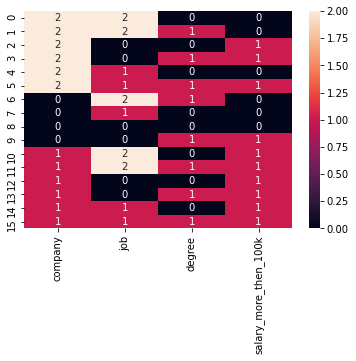

In [79]:
sns.heatmap(data , annot=True, fmt='d')

In [80]:
# SVM
from sklearn.datasets._samples_generator import make_blobs

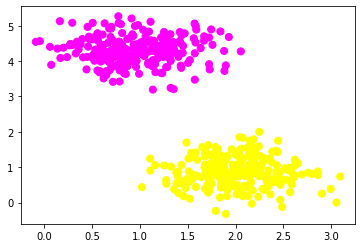

In [81]:
x , y = make_blobs(n_samples=500 , centers=2, random_state=0 , cluster_std=0.40)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='spring')
plt.show()

In [82]:
from sklearn.svm import SVC

In [83]:
model_svc = SVC(kernel='linear')
model_svc.fit(x, y)

SVC(kernel='linear')

In [84]:
model_svc.predict([[0 , 1]])

array([1])

In [85]:
len(x_test)

4

In [86]:
df = pd.DataFrame(data)
df.head()

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0


In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
m_ran = RandomForestClassifier()

In [89]:
m_ran.fit(x_train , y_train)

RandomForestClassifier()

In [90]:
m_ran.score(x_test , y_test)

0.25

In [91]:
yRANDOM_pred = m_ran.predict(x_test)
yRANDOM_pred

array([2, 2, 1, 0], dtype=int64)

In [93]:
cm = confusion_matrix(y_test, yRANDOM_pred)
cm

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 0]], dtype=int64)

<AxesSubplot:>

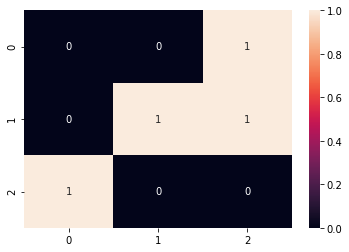

In [95]:
sns.heatmap(cm , annot=True)

c:\users\arijit\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


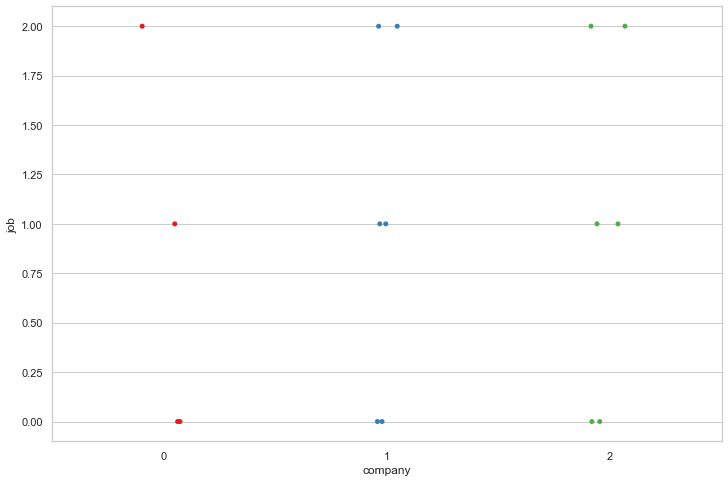

In [97]:
sns.set(style='whitegrid')
f , ax = plt.subplots(1,1 , figsize=(12,8))
ax= sns.stripplot(data['company'] , data['job'] , palette='Set1')
plt.show()

In [98]:
#K-NN ALGO
from sklearn.preprocessing import StandardScaler

In [99]:
st_x = StandardScaler()

In [103]:
x_train = st_x.fit_transform(x_train)
x_train

array([[ 1.42693538,  1.18321596,  0.84515425],
       [ 1.42693538,  1.18321596, -1.18321596],
       [ 0.10976426, -0.84515425,  0.84515425],
       [ 0.10976426,  1.18321596,  0.84515425],
       [-1.20740686, -0.84515425,  0.84515425],
       [ 0.10976426, -0.84515425, -1.18321596],
       [ 1.42693538, -0.84515425, -1.18321596],
       [-1.20740686, -0.84515425,  0.84515425],
       [ 0.10976426, -0.84515425, -1.18321596],
       [-1.20740686,  1.18321596,  0.84515425],
       [ 0.10976426,  1.18321596,  0.84515425],
       [-1.20740686, -0.84515425, -1.18321596]])

In [105]:
x_test= st_x.fit_transform(x_test)
x_test

array([[-1.        ,  0.57735027,  0.57735027],
       [-1.        ,  0.57735027,  0.57735027],
       [ 1.        , -1.73205081,  0.57735027],
       [ 1.        ,  0.57735027, -1.73205081]])

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [111]:
classifier.fit(x_train , y_train)

KNeighborsClassifier()

In [114]:
y_predKN = classifier.predict(x_test)
y_predKN

array([2, 2, 2, 0], dtype=int64)

In [116]:
cmKN = confusion_matrix(y_test , y_predKN)
cmKN

array([[0, 0, 1],
       [0, 0, 2],
       [1, 0, 0]], dtype=int64)

<AxesSubplot:>

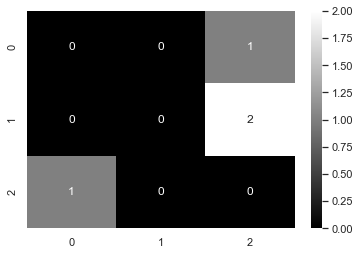

In [118]:
sns.heatmap(cmKN , annot=True, cmap='gray')
